# Ujjwal Gupta
# Task 3



INTERMEDIATE LEVEL TASK

# Exploratory Data Analysis on Dataset - Terrorism 

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 

In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline


In [3]:
Data = pd.read_csv('D:/Projects/LGM/globalterrorismdb_0718dist.csv', encoding = 'latin1')

C:\Users\ujjwa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
Data.shape

(181691, 135)

In [5]:
Data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# to see the data types
Data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [8]:
Data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193



Collect useful columns for our analysis. We kept 20 out of 153 columns from the original data

In [10]:
#Rename columns in order to get better format
Data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = Data[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [12]:
#SOME INFO FIRST
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [13]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
data['Damage']=data['Nkill']+data['Nwound']

<ipython-input-13-54e79c90bc82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Damage']=data['Nkill']+data['Nwound']


In [14]:
#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

<ipython-input-14-347d7cb6a5e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
<ipython-input-14-347d7cb6a5e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
<ipython-input-14-347d7cb6a5e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<ipython-input-15-126977a003f0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)


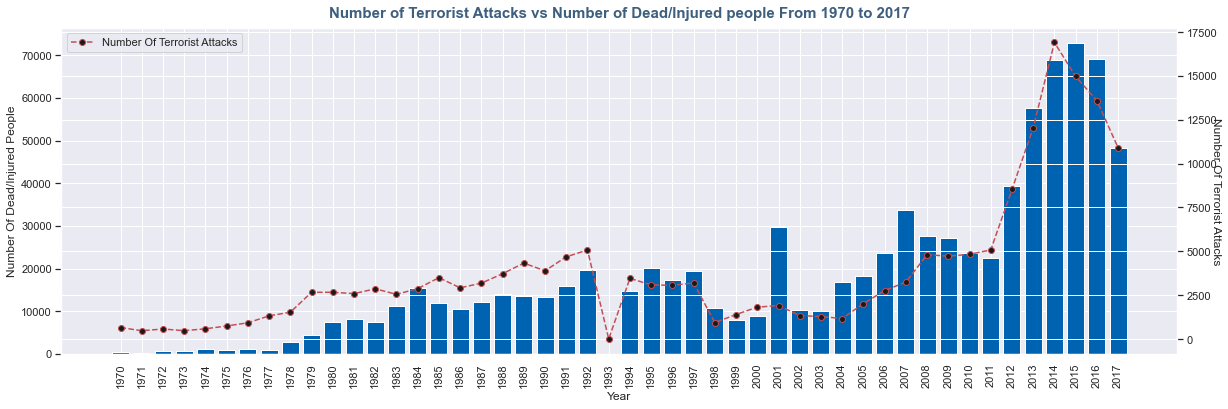

In [15]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

This graph show the number of global terrorist attacks and number 
of dead/injured people by year from 1970 to 2017. Overall, 
the number of attacks is increasing. The number of dead/injured people also 
increases respectively. The number of attack increased significantly from 2012 to 2015. 
The year 2015 is unlucky year with nearly 17000 reported terrorist attacks.

<ipython-input-16-15a338cfdb8e>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


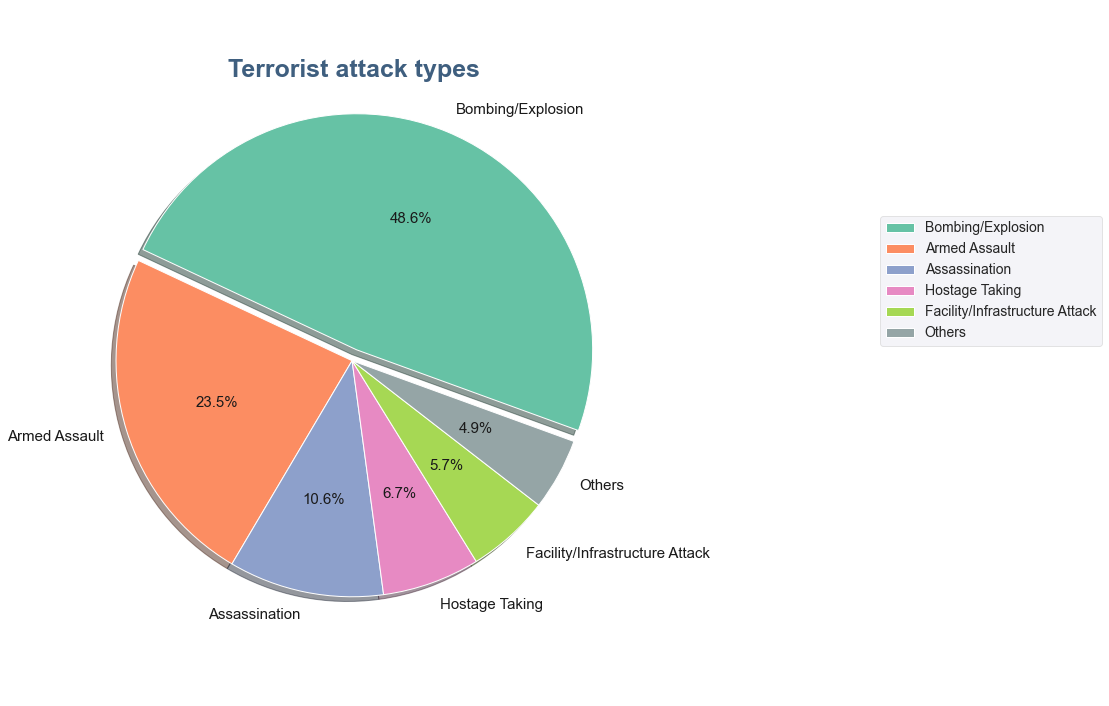

In [16]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()

# Analyse the Weapon types and Damage

<ipython-input-17-773066bf965a>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


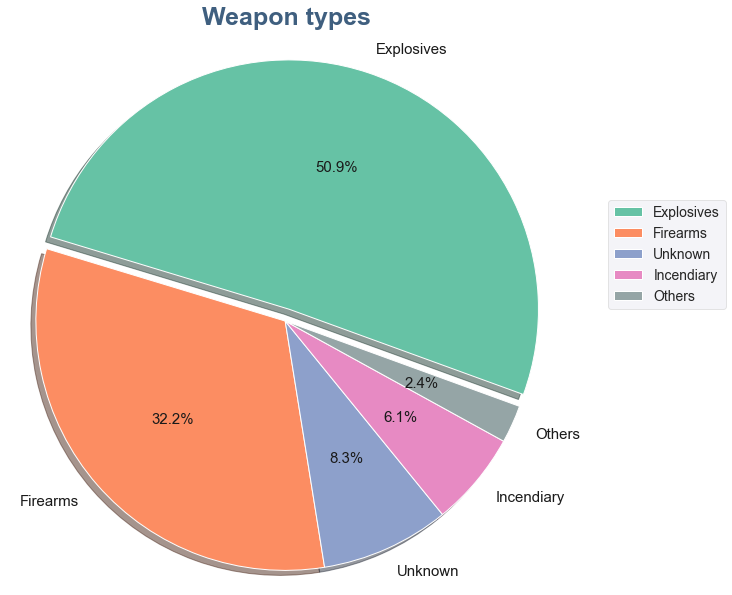

In [17]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [18]:
# Create table_2 about Weapon types and number of Dead/Injured People
table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


<ipython-input-19-d28bc77f172f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(weap_labels, rotation=45)
<ipython-input-19-d28bc77f172f>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


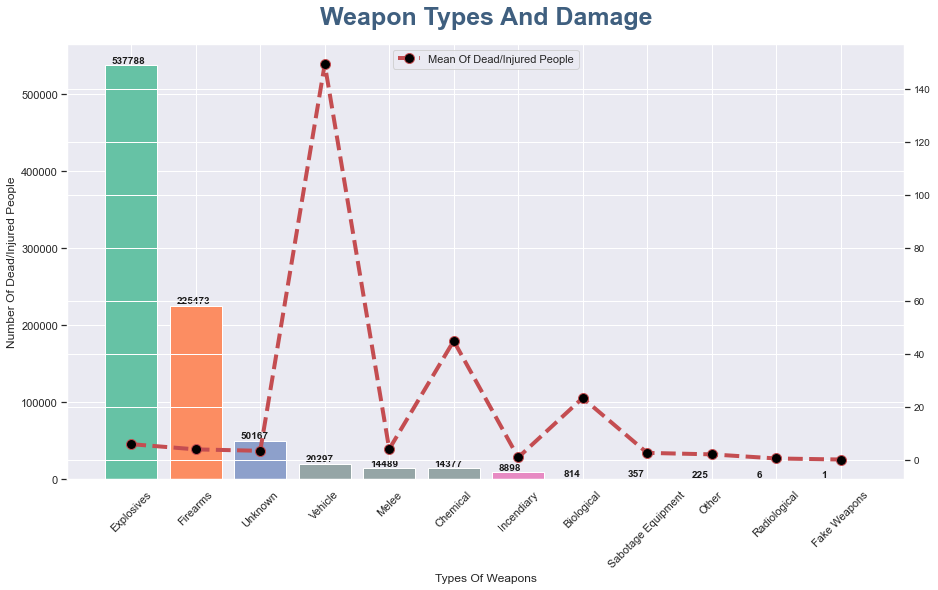

In [19]:
# Set same color with previous pie chart
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("Set2", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))

w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]

w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Weapon Types And Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()


Explosives and Firearms are the two most popular choice of terrorist attacks. However, the damage they cause per case are less than Vehicle, Chemical, and Biological weapons

If we want to avoid Terrorist Attacks and look for the best place to live, we should focus on the situation of each country in the last 2 decades.

Top 10 countries with the highest Number of Dead/Injured people in the world from 2000 to 2017

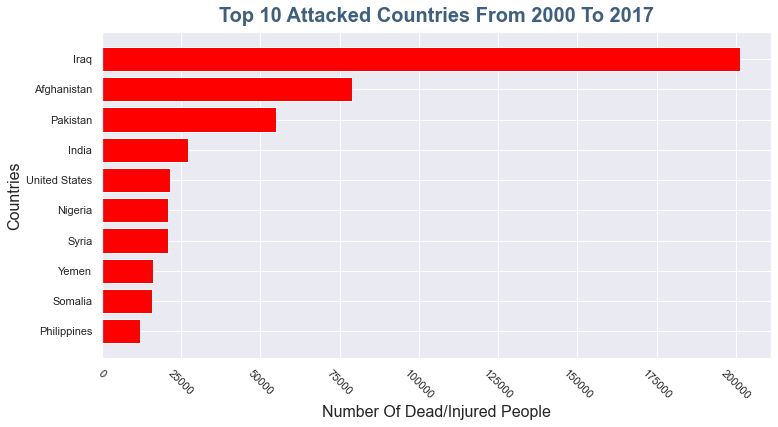

In [20]:

#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()


Top 10 targeted nationalities with the highest number of Dead/Injured People from 2000 to 2017

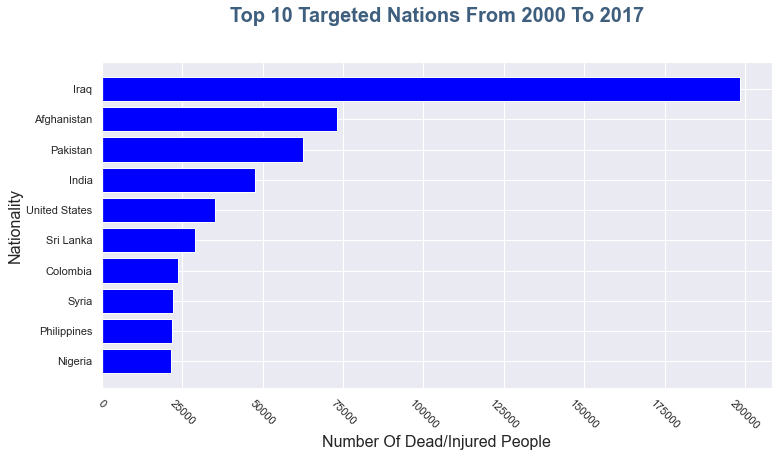

In [21]:

#Choose comlumn Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Targeted Nations From 2000 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

plt.show()


Before taking a look at the top 10 safest countries, we should take a look at top 10 most targerted countries and nationalities. Top 4 most targeted countries and nationalities are still Iraq, Pakistan, Afganistan and India. The situation have not been improved in the last 2 decadeds for these countries.